# Baboon's interactions dataset
---

*Source: http://www.sociopatterns.org/datasets/baboons-interactions/*  

We build the graph of interactions between baboons for the day 13/06/2019. For this purpose, we do not take into account the dynamicity of the interactions, an edge exists between two nodes as soon as an interaction exists between two baboons during this specific day.  
We add attributes to each node as the counts of different behaviors each baboon has during the day. We get 14 different behaviors (e.g 'resting', 'playing with'). Each baboon is described with a vector of integers corresponding to the kind of interactions it did.

**Libraries**

In [47]:
from IPython.display import SVG

from collections import defaultdict
import numpy as np
import pickle
from scipy import sparse

from sknetwork.data import from_edge_list, Bunch, save
from sknetwork.visualization import svg_graph

## 1. Load data

In [2]:
res = []
with open('data/OBS_data') as f:
    lines = f.readlines()
    for line in lines:
        res.append(line.split('\t'))

In [3]:
# Import data for day 13/06/2019
names = []
dict_behaviors = defaultdict(list)
for r in res[1:]:
    if r[0].split('/')[0] in ['13']:
        if len(r[1]) > 0:
            names.append(r[1].strip())
            dict_behaviors[r[1].strip()].append(r[3].strip())
        if len(r[2]) > 0:
            names.append(r[2].strip())
            dict_behaviors[r[2].strip()].append(r[3].strip())
names = np.unique(names)
baboons = np.arange(0, len(names))

# Number of behaviors
names_col = set()
for k, v in dict_behaviors.items():
    for b in v:
        names_col.add(b)
names_col = np.array(list(names_col))
behaviors = np.arange(0, len(names_col))

# Behavior matrix: count of different behavior for each baboon
biadjacency = np.zeros((len(baboons), len(behaviors)))
for k, v in dict_behaviors.items():
    behav, cnt = np.unique(v, return_counts=True)
    for b, c in zip(behav, cnt):
        idx_baboon = np.where(names == k)[0][0]
        biadjacency[idx_baboon][np.where(names_col == b)[0][0]] = c
        
biadjacency = sparse.csr_matrix(biadjacency)

In [4]:
# Most frequent behaviors
names_col[np.argsort(-biadjacency.T.dot(np.ones((biadjacency.shape[0]))))]

array(['Resting', 'Playing with', 'Grooming', 'Other', 'Invisible',
       'Presenting', 'Touching', 'Grunting-Lipsmacking', 'Supplanting',
       'Submission', 'Threatening', 'Carrying', 'Avoiding', 'Attacking'],
      dtype='<U20')

In [5]:
# number of baboons
print(len(names))

19


In [6]:
dict_babs = {n: i for i, n in zip(baboons, names)}

In [8]:
# Add edges to graph
edges = set()
for r in res[1:]:
    if r[0].split('/')[0] in ['13']:
        if r[1] != '' and r[2] != '':
            edges.add((dict_babs.get(r[1].strip()), dict_babs.get(r[2].strip())))
            
edges = [x for x in edges]

In [9]:
print(len(edges))

77


In [10]:
adjacency = from_edge_list(edges).astype(bool)

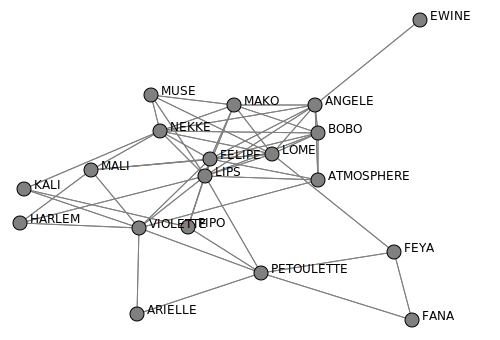

In [39]:
image = svg_graph(adjacency, names=names)
SVG(image)

In [13]:
print(adjacency.shape)
print(biadjacency.shape)

(19, 19)
(19, 14)


In [16]:
{i: n for i, n in enumerate(names) if n == 'EWINE'}

{4: 'EWINE'}

In [19]:
names_col[biadjacency[4, :].indices]

array(['Supplanting', 'Invisible', 'Other', 'Resting'], dtype='<U20')

In [20]:
{i: n for i, n in enumerate(names) if n == 'NEKKE'}

{15: 'NEKKE'}

In [21]:
names_col[biadjacency[15, :].indices]

array(['Touching', 'Carrying', 'Invisible', 'Playing with', 'Other',
       'Resting'], dtype='<U20')

In [22]:
{i: n for i, n in enumerate(names) if n == 'LOME'}

{11: 'LOME'}

In [23]:
names_col[biadjacency[11, :].indices]

array(['Submission', 'Grooming', 'Supplanting', 'Invisible',
       'Playing with', 'Other', 'Resting', 'Attacking'], dtype='<U20')

In [27]:
{i: n for i, n in enumerate(names) if n == 'PETOULETTE'}

{16: 'PETOULETTE'}

In [28]:
names_col[biadjacency[16, :].indices]

array(['Touching', 'Grooming', 'Grunting-Lipsmacking', 'Presenting',
       'Other', 'Resting'], dtype='<U20')

In [30]:
print(biadjacency.todense())

[[ 0.  0.  3.  1.  0.  0.  0.  0.  0.  0.  0.  3. 21.  0.]
 [ 0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  0.]
 [ 0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  1.  1.  5.  0.]
 [ 0.  0.  6.  2.  0.  2.  0.  0.  2.  0.  0.  4. 10.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  5.  0.  0.  0.  5.  2.  0.]
 [ 1.  0.  2.  0.  0.  0.  0.  2.  1.  0.  0.  5.  3.  0.]
 [ 1.  0.  7.  1.  0.  3.  1.  3.  3.  0.  1.  6. 28.  0.]
 [ 1.  0.  3.  0.  0.  0.  0.  1.  1.  0.  1.  3.  5.  0.]
 [ 0.  0.  4.  0.  0.  0.  0.  1.  0.  1.  0.  1.  3.  0.]
 [ 0.  0.  1.  1.  0.  1.  0.  1.  0.  0.  0.  1.  4.  0.]
 [ 1.  1.  6.  0.  2.  0.  0.  5.  0.  0. 20.  3. 13.  0.]
 [ 0.  1.  2.  1.  0.  0.  0.  2.  0.  0. 20.  3. 15.  1.]
 [ 0.  0.  2.  0.  0.  0.  0.  1.  0.  0. 19.  2. 11.  0.]
 [ 1.  1.  3.  0.  0.  0.  0.  2.  0.  0.  5.  2.  2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 33.  0. 13.  0.]
 [ 3.  0.  0.  0.  0.  0.  1.  1.  0.  0. 48.  4. 15.  0.]
 [ 2.  0.  4.  0.  0.  2.  0.  0.  3.  0.  0.  1.  4.  0

In [43]:
{i: n for i, n in enumerate(names) if n in ['PETOULETTE', 'FEYA', 'FANA']}

{5: 'FANA', 7: 'FEYA', 16: 'PETOULETTE'}

In [44]:
print(biadjacency[[5, 7, 16], :].todense())

[[1. 0. 2. 0. 0. 0. 0. 2. 1. 0. 0. 5. 3. 0.]
 [1. 0. 3. 0. 0. 0. 0. 1. 1. 0. 1. 3. 5. 0.]
 [2. 0. 4. 0. 0. 2. 0. 0. 3. 0. 0. 1. 4. 0.]]


## 2. Save dataset

In [52]:
dataset = Bunch()
dataset.adjacency = adjacency
dataset.biadjacency = biadjacency
dataset.names = names
dataset.names_col = names_col

meta = Bunch()
meta.name = "Baboon\'s interactions on 13/06/2019."
meta.description = 'Links connecting baboons between each other if they interacted at least once on 13/06/2019.'
meta.source = 'http://www.sociopatterns.org/datasets/baboons-interactions/'
meta.date = 'October 2022'
dataset.meta = meta

In [53]:
with open('data/baboons', 'bw') as f:
    pickle.dump(dataset, f)

In [54]:
with open('data/baboons', 'br') as f:
    dataset = pickle.load(f)

In [55]:
graph = dataset
graph.adjacency

<19x19 sparse matrix of type '<class 'numpy.bool_'>'
	with 108 stored elements in Compressed Sparse Row format>